In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [2]:
nPopulasi = 16
nIndividu = 6

def initPopulasi(nPopulasi,nIndividu):
    populasi = []
    for i in range(nPopulasi):
        arr = []
        for j in range(nIndividu):
            r = random.randint(0,1)
            arr.append(r)
        populasi.append(arr)
    return populasi

In [3]:
def fungsiDekode(individu):
    min1 = -1
    min2 = -1
    max1 = 2
    max2 = 1
    x1 = min1 + (max1-min1)/(math.pow(2,-1) + math.pow(2,-2)+ math.pow(2,-3)) * (individu[0] * math.pow(2,-1) + individu[1] * math.pow(2,-2) + individu[2] * math.pow(2,-3))
    x2 = min2 + (max2-min2)/(math.pow(2,-1) + math.pow(2,-2) +math.pow(2,-3)) * (individu[3] * math.pow(2,-1) + individu[4] * math.pow(2,-2) + individu[5] * math.pow(2,-3))
    return x1,x2

In [4]:
def fitness(x1,x2):
    Cos = np.cos(x1)
    Sin = np.sin(x2)
    h = ((Cos * Sin) - (x1 / x2**2 + 1))
    return -h

In [5]:
def nilaiFitness(individu):
    x1,x2 = fungsiDekode(individu)
    return fitness(x1,x2)

In [6]:
def sort_populasi(populasi):
    return sorted(populasi, key = lambda individu: nilaiFitness(individu))

In [7]:
def totalFitness(populasi):
    total = 0
    for i in range(len(populasi)):
        total += nilaiFitness(populasi[i])
    return total

In [8]:
def probabilitas(fitness,totalFitness):
    return fitness / totalFitness

In [9]:
def probKumulative(populasi):
    arrK = []
    total = 0
    for i in range(len(populasi)):
        total += probabilitas(nilaiFitness(populasi[i]), totalFitness(populasi))
        arrK.append(total)
    return arrK

In [10]:
def rouletteWheel(populasi):
    arrKum = probKumulative(populasi)
    parent = []
    r = np.random.uniform(low = np.amin(probKumulative(populasi)), high = np.amax(probKumulative(populasi)))
    i = 0
    while r > 0 and i <= len(populasi):
        r -= arrKum[i]
        i +=1
    parent = populasi[i]
    return parent

In [11]:
probCross = 0.6
def CrossOver(Parent1,Parent2,probCross):
    child1 = Parent1.copy()
    child2 = Parent2.copy()
    prob = random.random()
    if prob <= probCross:
        child1[1] = Parent2[1]
        child2[1] = Parent1[1]
    return child1,child2
        

In [12]:
probMutasi = 0.01
def mutasi(ChildL,probMutasi):
    arrMutasi = ChildL
    for i in range(len(arrMutasi)):
        r = random.random()
        randKromosom = random.randint(1,nIndividu-1)
        if r> 0 and r <= probMutasi and i > 0:
            if arrMutasi[randKromosom] == 0:
                arrMutasi[randKromosom] = 1
            else:
                arrMutasi[randKromosom] = 0
                
    return arrMutasi 

In [13]:
def maxFit(populasi):
    fit = []
    for i in range(len(populasi)):
        fit.append(nilaiFitness(populasi[i]))
    max = 0
    index = 0
    for i in range(len(populasi)):
        if max < fit[i]:
            max = fit[i]
            index = i
    return populasi[index]

In [14]:
def elitism(populasi,n):
    sortedPopulasi = sort_populasi(populasi)
    return sortedPopulasi[-n:]

In [15]:
def genReplacement():
    fit = []
    maxGen = 512
    oldGen = initPopulasi(nPopulasi,nIndividu)
    for i in range(maxGen):
        newPop = elitism(oldGen,2)
        while len(newPop) < nPopulasi:
            parent1 = rouletteWheel(oldGen)
            parent2 = rouletteWheel(oldGen)
            child1,child2 = CrossOver(parent1,parent2,probCross)
            child1 = mutasi(child1,probMutasi)
            child2 = mutasi(child2,probMutasi)
            newPop.append(child1)
            newPop.append(child2)
        oldGen = newPop
        fit.append(nilaiFitness(maxFit(oldGen)))
    
    bestGen = oldGen
    bestIndividu = maxFit(bestGen)
    x1,x2 = fungsiDekode(bestIndividu)
    print("Best Kromosom = ",bestIndividu)
    print("x1 = ",x1)
    print("x2 = ",x2)
    nilaiFit = np.cos(x1) * np.sin(x2) - (x1 / (math.pow(x2,2) + 1))
    print("Nilai Fitness = ",nilaiFit)
    plt.plot(fit)
    plt.show()

Best Kromosom =  [1, 1, 1, 1, 0, 0]
x1 =  2.0
x2 =  0.1428571428571428
Nilai Fitness =  -2.019247544966795


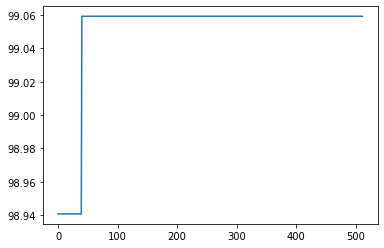

In [17]:
genReplacement()